In [1]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/MLQL/integrated_workout_data.csv')

print(data.head())

                   Timestamp   Latitude  Longitude  Elevation     Speed  \
0  2024-04-04 19:50:43+00:00  52.339293   4.874098   6.255328  0.003198   
1  2024-04-04 19:50:44+00:00  52.339294   4.874098   6.253835  0.002975   
2  2024-04-04 19:50:45+00:00  52.339294   4.874098   6.277660  0.004297   
3  2024-04-06 11:29:16+00:00  52.378674   4.806618   0.715324  0.017061   
4  2024-04-06 11:29:17+00:00  52.378674   4.806618   0.725807  0.049166   

      Course  HeartRate   duration  totalEnergyBurned Activity  
0  65.000370      140.0  19.981806                0.0  walking  
1  65.000370      140.0  19.981806                0.0  walking  
2  65.000370      140.0  19.981806                0.0  walking  
3   1.393316      143.0  17.966557                0.0   biking  
4   1.363403      143.0  17.966557                0.0   biking  


In [2]:
summary = data.describe()
print(summary)


           Latitude     Longitude     Elevation         Speed        Course  \
count  31221.000000  31221.000000  31221.000000  31221.000000  31221.000000   
mean      52.374272      4.828650      1.614210      3.689501    188.668996   
std        0.042768      0.045708      1.292837      1.817448     98.896881   
min       52.093441      4.787728     -3.033531      0.000000      0.004906   
25%       52.379269      4.806602      0.738416      2.907418     89.942032   
50%       52.380916      4.821221      1.525593      4.452063    179.801721   
75%       52.382882      4.838128      2.439526      4.994870    281.632607   
max       52.383786      5.110594      6.404089      7.840940    359.991815   

          HeartRate      duration  totalEnergyBurned  
count  31221.000000  31221.000000            31221.0  
mean     148.207713     18.576615                0.0  
std       13.344422      4.304871                0.0  
min       85.000000      8.181380                0.0  
25%      141.

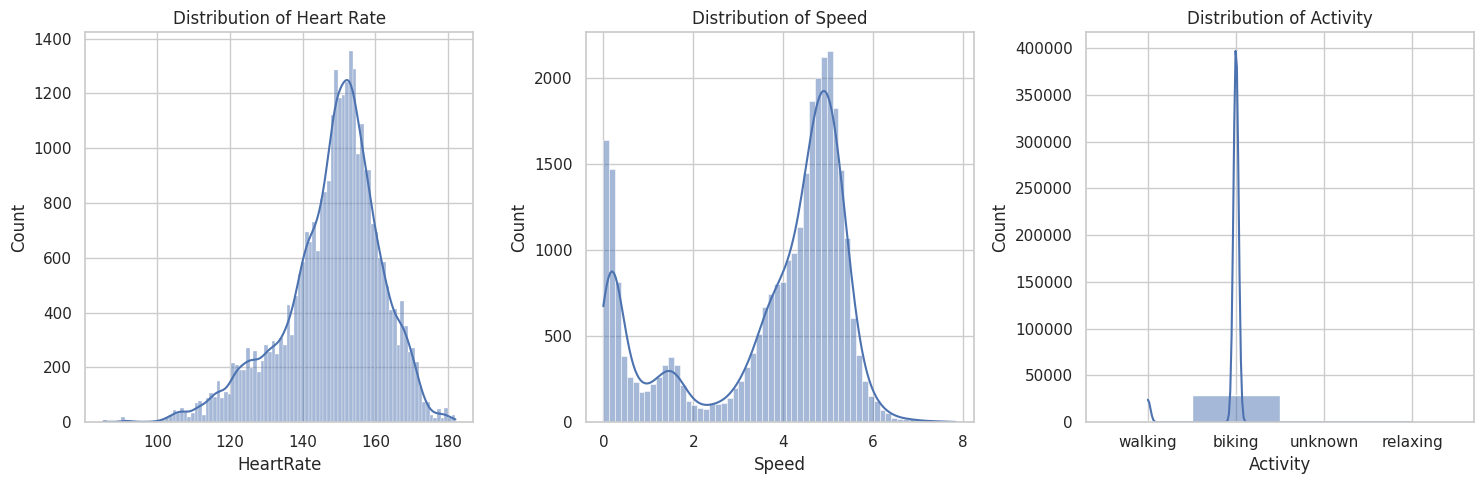

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['HeartRate'], kde=True)
plt.title('Distribution of Heart Rate')

plt.subplot(1, 3, 2)
sns.histplot(data['Speed'], kde=True)
plt.title('Distribution of Speed')

plt.subplot(1, 3, 3)
sns.histplot(data['Activity'], kde=True)
plt.title('Distribution of Activity')

plt.tight_layout()
plt.show()


                   Latitude  Longitude  Elevation     Speed    Course  \
Latitude           1.000000  -0.935989  -0.272477  0.248664 -0.119634   
Longitude         -0.935989   1.000000   0.419814 -0.222462  0.093787   
Elevation         -0.272477   0.419814   1.000000 -0.145866 -0.013566   
Speed              0.248664  -0.222462  -0.145866  1.000000 -0.068026   
Course            -0.119634   0.093787  -0.013566 -0.068026  1.000000   
HeartRate          0.384304  -0.291949  -0.152942  0.551059 -0.204248   
duration          -0.300807   0.203567  -0.131920 -0.174755  0.189574   
totalEnergyBurned       NaN        NaN        NaN       NaN       NaN   

                   HeartRate  duration  totalEnergyBurned  
Latitude            0.384304 -0.300807                NaN  
Longitude          -0.291949  0.203567                NaN  
Elevation          -0.152942 -0.131920                NaN  
Speed               0.551059 -0.174755                NaN  
Course             -0.204248  0.189574    

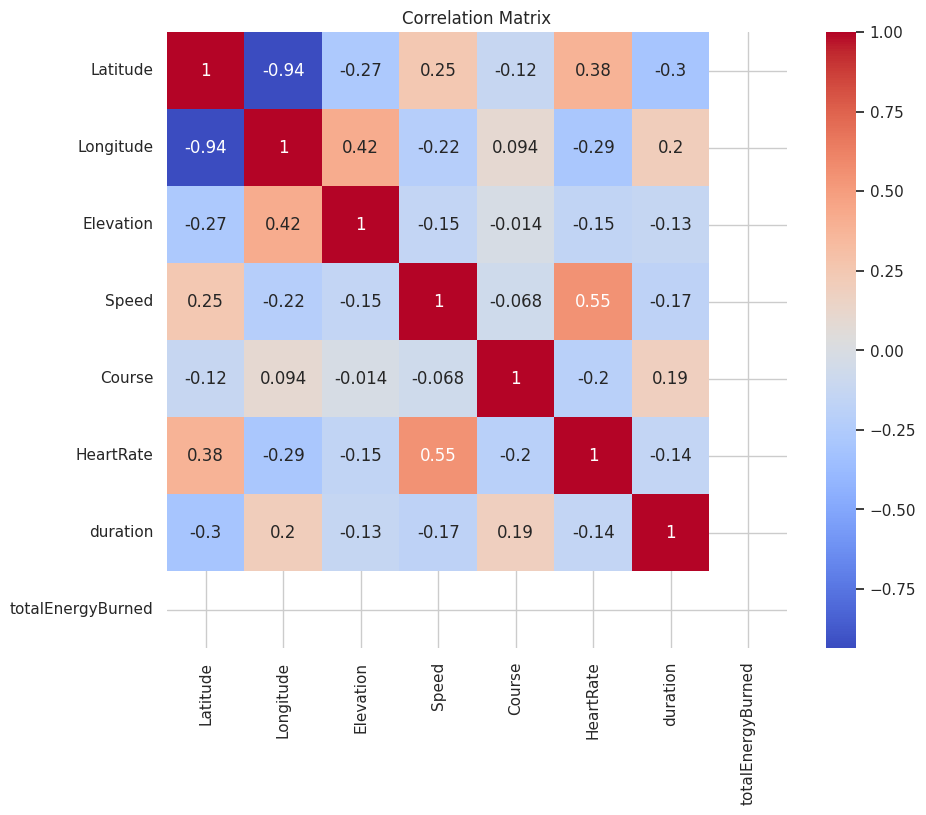

In [9]:
numeric_columns = ['Latitude', 'Longitude', 'Elevation', 'Speed', 'Course', 'HeartRate', 'duration', 'totalEnergyBurned']
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Timestamp            0
Latitude             0
Longitude            0
Elevation            0
Speed                0
Course               0
HeartRate            0
duration             0
totalEnergyBurned    0
Activity             0
dtype: int64


In [11]:
data['HeartRate'].fillna(data['HeartRate'].mean(), inplace=True)
data['Speed'].fillna(data['Speed'].mean(), inplace=True)
data['Elevation'].fillna(data['Elevation'].mean(), inplace=True)


In [12]:
data.dropna(thresh=len(data.columns) - 2, inplace=True)


In [17]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

In [ ]:
data = remove_outliers(data, 'HeartRate')
data = remove_outliers(data, 'Speed')

In [18]:
data = remove_outliers(data, 'Course')

In [19]:
summary = data.describe()
print(summary)

           Latitude     Longitude     Elevation         Speed        Course  \
count  26325.000000  26325.000000  26325.000000  26325.000000  26325.000000   
mean      52.378109      4.824926      1.565701      4.282402    189.965897   
std        0.029312      0.033007      1.156734      1.219144     97.446559   
min       52.093441      4.787845     -1.642502      0.475317      0.017239   
25%       52.379563      4.806737      0.760514      3.861180     90.025157   
50%       52.381617      4.820470      1.493894      4.643781    179.744863   
75%       52.382938      4.836498      2.344361      5.064542    282.098257   
max       52.383786      5.110594      4.783119      7.701274    359.983251   

          HeartRate      duration  
count  26325.000000  26325.000000  
mean     150.718215     18.345059  
std       10.958497      4.089628  
min      117.000000      8.181380  
25%      144.000000     16.129359  
50%      151.000000     17.396925  
75%      158.000000     19.599874  


In [15]:
data.drop(columns=['totalEnergyBurned'], inplace=True)

In [20]:
data.head(100)

,Timestamp,Latitude,Longitude,Elevation,Speed,Course,HeartRate,duration,Activity
9,2024-04-06 11:29:22+00:00,52.378688,4.806614,0.776226,1.606715,344.195411,140.0,17.966557,biking
10,2024-04-06 11:29:23+00:00,52.378704,4.806604,0.783814,2.328700,335.714788,140.0,17.966557,biking
11,2024-04-06 11:29:24+00:00,52.378725,4.806590,0.789628,2.544453,340.840114,140.0,17.966557,biking
12,2024-04-06 11:29:25+00:00,52.378749,4.806579,0.793450,2.988316,345.837112,140.0,17.966557,biking
13,2024-04-06 11:29:26+00:00,52.378779,4.806569,0.795155,3.814811,350.124320,140.0,17.966557,biking
...,...,...,...,...,...,...,...,...,...
104,2024-04-06 11:30:57+00:00,52.382703,4.808211,1.668828,5.897453,73.623079,164.0,17.966557,biking
105,2024-04-06 11:30:58+00:00,52.382718,4.808293,1.722531,5.836597,71.959232,164.0,17.966557,biking
106,2024-04-06 11:30:59+00:00,52.382736,4.808373,1.777997,5.713166,69.580919,164.0,17.966557,biking
107,2024-04-06 11:31:00+00:00,52.382754,4.808452,1.832942,5.725148,68.262881,164.0,17.966557,biking


from matplotlib import pyplot as plt
_df_0['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Elevation'].plot(kind='hist', bins=20, title='Elevation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Speed'].plot(kind='hist', bins=20, title='Speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Longitude', y='Elevation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Elevation', y='Speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Speed', y='Course', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Elevation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Elevation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Speed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Course']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Course')

from matplotlib import pyplot as plt
_df_12['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Elevation'].plot(kind='line', figsize=(8, 4), title='Elevation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Speed'].plot(kind='line', figsize=(8, 4), title='Speed')
plt.gca().spines[['top', 'right']].set_visible(False)

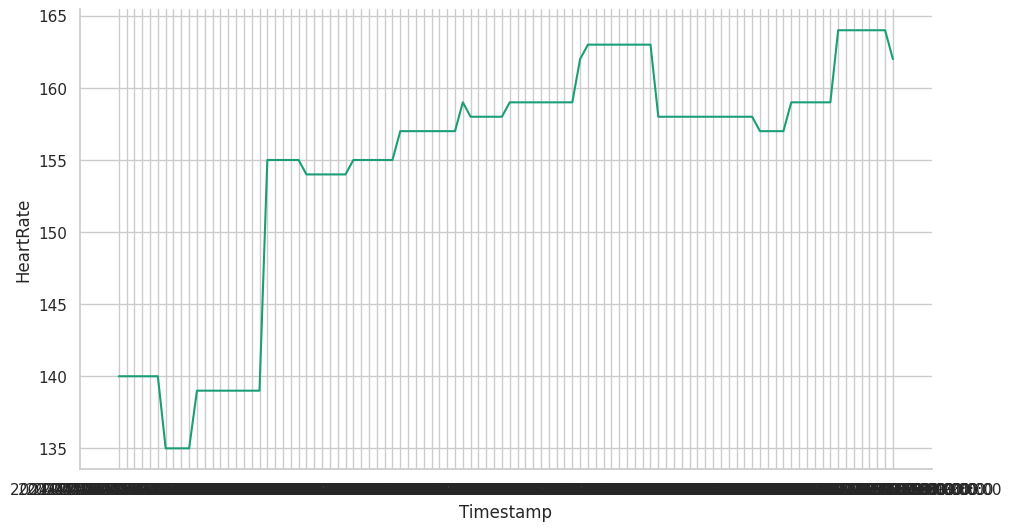

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['HeartRate']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('HeartRate')

In [22]:
unique_activities = data['Activity'].unique()

In [23]:
unique_activities

array(['biking', 'unknown', 'walking'], dtype=object)